Titanic Data Analysis

Questions:
1) Who were the passengers on the Titanic?
2) What deck ere the passengers on and how deoes that relate to their class?
3) Where did the passenger come from?
4) Who was alone and who was with family?
5) What factors helped someone survive the sinking?

Import the libs

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#titanic_df['Age'] = titanic_df.Age.fillna(0).astype(int)

titanic_df.info()

#titanic_df['Age'] = titanic_df['Age'].replace(int(0), np.nan)

#titanic_df.head()

#titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



Male vs Female

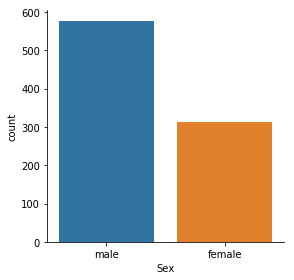

In [4]:
sns.factorplot('Sex',data = titanic_df, kind='count')

Male vs Female in each class

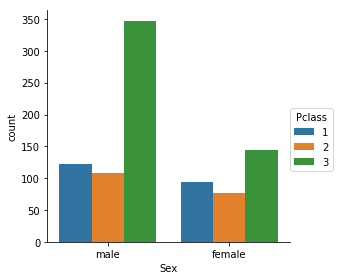

In [5]:
sns.factorplot('Sex',data = titanic_df, hue = 'Pclass', kind = 'count')

male vs Female in each class

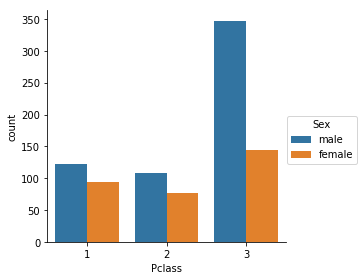

In [6]:
sns.factorplot('Pclass',data = titanic_df, hue = 'Sex', kind = 'count')

In [7]:
# a function that can identify children (age < 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
# apply the function, create a new column  
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


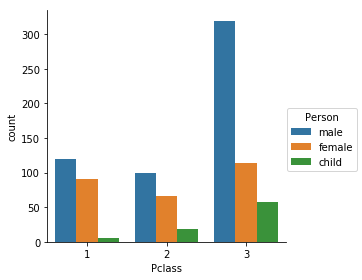

In [10]:
# Male vs Female vs Child in each class
sns.factorplot('Pclass', data = titanic_df, hue = 'Person', kind = 'count')

We can see there are a lot more children in 3rd class than any other class. And most the male are in 3rd class. 

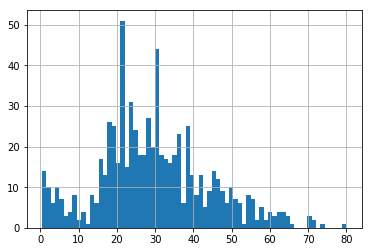

In [11]:
# age histogram
titanic_df['Age'].hist(bins = 70)

In [12]:
#age mean
titanic_df['Age'].mean()

29.69911764705882

In [13]:
# number of male, female and children
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [14]:
# remove NaN in deck
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

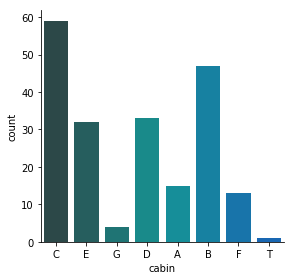

In [15]:
# pass first letter in deck as level
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['cabin']

sns.factorplot('cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

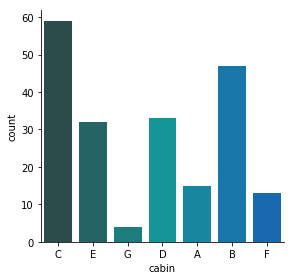

In [16]:
# remove T 
cabin_df = cabin_df[cabin_df.cabin != 'T']

sns.factorplot('cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

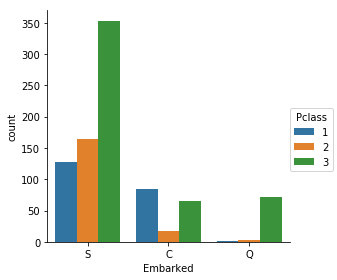

In [17]:
# plot where passengers get on 
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass', kind = 'count')

C: Cherbourg, Q: Queenstown, S: Southhampton.
An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class.

In [18]:
# who was alone and who was with family?

# add a column 'Alone' 
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

If the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [19]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'WIth Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
titanic_df['Alone'].head()

0    WIth Family
1    WIth Family
2          Alone
3    WIth Family
4          Alone
Name: Alone, dtype: object

In [21]:
#titanic_df.head()

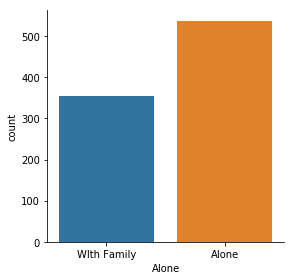

In [22]:
# Now let's get a simple visualization!
sns.factorplot('Alone', data = titanic_df, kind = 'count')

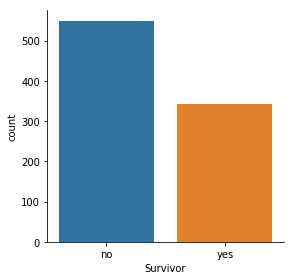

In [23]:
# start by creating a new column for 
#legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
# just get a quick overall view of survied 
sns.factorplot('Survivor', data = titanic_df, kind = 'count')

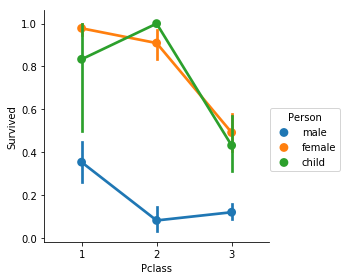

In [24]:
# use a factor plot again, but now considering class and gender
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this. From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

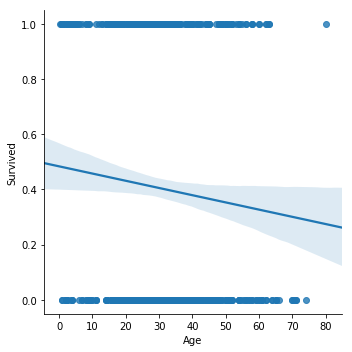

In [25]:
sns.lmplot('Age', 'Survived', data = titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived.

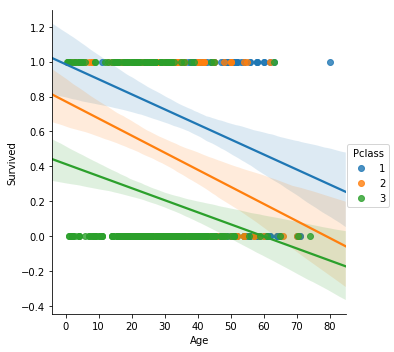

In [26]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df)

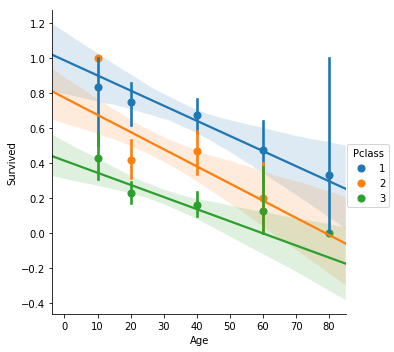

In [27]:
generation = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, x_bins = generation)

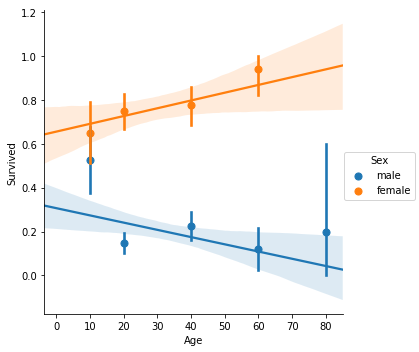

In [28]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, x_bins = generation)

Looks like elder female has a much greater survival odd than elder male. 

More questions:
1) Did the deck have an effect on the passengers survival rate?
2) Did having a family memebr increase the odds of suvival?

In [29]:
#titanic_df['Cabin'].head()

In [30]:
#titanic_df['Cabin'].isnull().any()

In [31]:
#titanic_df['Cabin'][1] = 'C'

In [32]:
#titanic_df['Cabin'][3][0]

In [33]:
# create a new column 'New Cabin' which contains the first letter of 'Cabin' 
new_deck = titanic_df['Cabin']

new_level = []

for level in new_deck:
    level = str(level)
    if level != 'nan':
        new_level.append(level[0])
    elif level == 'nan':
        new_level.append(np.nan)

new_level[:10]

titanic_df['New_Cabin'] = new_level

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,WIth Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,WIth Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,WIth Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


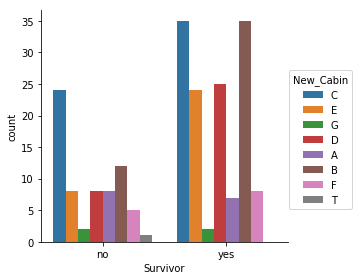

In [35]:
sns.factorplot('Survivor', hue = 'New_Cabin', data = titanic_df, kind = 'count')

In [36]:
#sns.factorplot('Age', 'New_Cabin', data = titanic_df)
#sns.factorplot('New_Cabin','Age', data = titanic_df)

In [37]:
#sns.factorplot('New_Cabin', 'Survived', hue = 'Person', data = titanic_df)
#sns.factorplot('New_Cabin', 'Survived', data = titanic_df)
#g = sns.lmplot('Age', 'Survived', hue = 'New_Cabin', data = titanic_df, x_bins = generation)
#g = sns.factorplot('Age', 'Survived', hue = 'New_Cabin', data = titanic_df, x_bins = generation)
#g.set(ylim=(-1, 2))

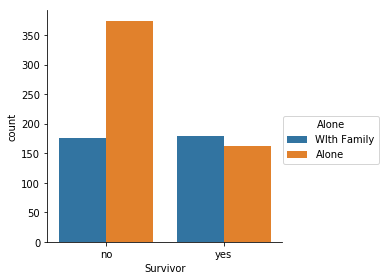

In [38]:
sns.factorplot('Survivor', hue = 'Alone', data = titanic_df, kind = 'count')

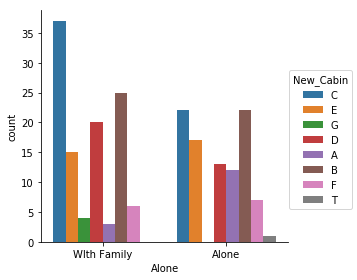

In [39]:
sns.factorplot('Alone',hue = 'New_Cabin', data = titanic_df, kind = 'count')